# Custom Training, Layers, and Testing

I am going to combine the last 3 sections into this single notebook. [Custom Training: basics](https://www.tensorflow.org/tutorials/eager/custom_training), [Custom layers](https://www.tensorflow.org/tutorials/eager/custom_layers), and [Custom Training: walkthrough](https://www.tensorflow.org/tutorials/eager/custom_training_walkthrough).  

This will be an interesting trip as I have only used Keras for training on actual projects and have some some fitting in class but not with TensorFlow. I do think something like this is good to help understand the gears of how a model works. Keras hides all of this but you still need to understand it.

## Custom Training: Basics

In [1]:
import tensorflow as tf
tf.enable_eager_execution() #Remember that v2 will have this on by default

From the text: Tensors in TF are immutable stateless objects. ML needs to have ever changing states. Luckily, python is a stateful programming language

In [2]:
x = tf.zeros([10,10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


TensorFlow does have stateful operations built in. For example, in a model it is convenient and efficient to use TensorFlow variables. I was just introduced to them while I was converting a previous TF project to v2 since I couldn't use the place holders.

In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0 #Ensure it is really 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

**Fitting a linear model**  
This problems always caused me pause because I try and make them harder than they need to be. I also seem to struggle with wrapping my head around multi-dimensional graphs.  

This will come in 4 parts  
* Define the model  
* Define a loss function  
* Obtain training data  
* Run through training data and use an "optimizer" to adjust the variables  


**Define the model**

In [5]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0) #Weight
        self.b = tf.Variable(0.0) #Bias
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()

assert model(3.0).numpy() == 15.0 #5.0 (weight) * X (variable) + b (bias)

**Define a loss function**  
A loss function measure how well you are doing during training. It determines how well the input matches the output.  

Here we will use the standard L2 loss function

In [6]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

**Obtain training data**

In [7]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

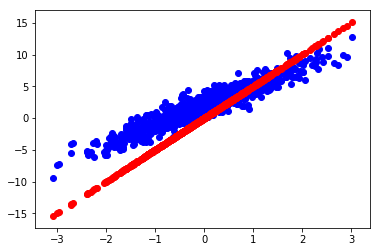

Current loss: 
8.938526


In [8]:
#Plot the current model
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

**Define a training loop**  
We will use stochastic gradient descent to adjust the variables to minimize the loss (difference between expected and actual).

In [9]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.93853
Epoch  1: W=4.61 b=0.40, loss=6.12615
Epoch  2: W=4.30 b=0.72, loss=4.31017
Epoch  3: W=4.04 b=0.98, loss=3.13744
Epoch  4: W=3.84 b=1.18, loss=2.38001
Epoch  5: W=3.67 b=1.35, loss=1.89077
Epoch  6: W=3.54 b=1.48, loss=1.57471
Epoch  7: W=3.43 b=1.58, loss=1.37050
Epoch  8: W=3.35 b=1.67, loss=1.23856
Epoch  9: W=3.27 b=1.73, loss=1.15328


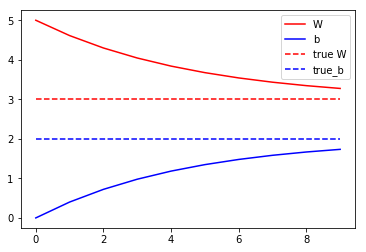

In [10]:
model = Model()

#Collect histories to plot
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))
    
#Plot All The Things
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W','b','true W', 'true_b'])
plt.show()

## Custom Layers

This section is building custom layers that would normally be done with *keras.layers*.

In [11]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(10, input_shape=(None,5))

In [12]:
layer(tf.zeros([10,5]))

<tf.Tensor: id=731, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
#Check the trainable variables for each tensor object
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.23094189,  0.06348073,  0.02718323, -0.40510726,  0.04415697,
         -0.42273542,  0.17979628, -0.19385391,  0.05148983, -0.07007742],
        [-0.45589864,  0.21968108,  0.04630387, -0.62175643, -0.54956806,
          0.36805338,  0.06962144,  0.00430626,  0.031443  , -0.20818433],
        [-0.47453225, -0.01458627, -0.5930988 , -0.5316438 , -0.44804132,
         -0.34563407,  0.25458574, -0.5099404 , -0.42170388,  0.2963159 ],
        [-0.42549515, -0.5287014 , -0.15480691,  0.24445653,  0.13021183,
          0.3782106 , -0.61899835, -0.40430504,  0.35701942, -0.23394665],
        [ 0.44224268, -0.13120615, -0.56639266, -0.2017586 ,  0.03027064,
         -0.15569463,  0.5883978 , -0.00228399,  0.21583313, -0.1011498 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [16]:
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.23094189,  0.06348073,  0.02718323, -0.40510726,  0.04415697,
         -0.42273542,  0.17979628, -0.19385391,  0.05148983, -0.07007742],
        [-0.45589864,  0.21968108,  0.04630387, -0.62175643, -0.54956806,
          0.36805338,  0.06962144,  0.00430626,  0.031443  , -0.20818433],
        [-0.47453225, -0.01458627, -0.5930988 , -0.5316438 , -0.44804132,
         -0.34563407,  0.25458574, -0.5099404 , -0.42170388,  0.2963159 ],
        [-0.42549515, -0.5287014 , -0.15480691,  0.24445653,  0.13021183,
          0.3782106 , -0.61899835, -0.40430504,  0.35701942, -0.23394665],
        [ 0.44224268, -0.13120615, -0.56639266, -0.2017586 ,  0.03027064,
         -0.15569463,  0.5883978 , -0.00228399,  0.21583313, -0.1011498 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

**Implementing Custom Layers**  
I have never done this before so this was also interesting. I don't know if I will ever be in a situation to do this but it will be handy to have it.

In [18]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self,num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        
    def call(self, input):
        return tf.matmul(input, self.kernel)
    
layer = MyDenseLayer(10)
print(layer(tf.zeros([10,5])))
print(layer.trainable_variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.44628054, -0.01872784,  0.03775793,  0.33660483,  0.24217433,
         0.56332034, -0.40987974, -0.2229039 ,  0.5479608 , -0.59185797],
       [ 0.27436328,  0.3015436 ,  0.3526969 , -0.587441  ,  0.08196038,
         0.0659799 ,  0.11645865,  0.3049655 ,  0.18364125,  0.11761856],
       [ 0.06960881, -0.46586096, -0.01633739,  0.5495692 , -0.15964094,
        -0.2819932 ,  0.09016919, -0.619078  ,  0.49734908, -0.1849474 ],
       [ 0.10292339, -0.15812081,  0.36772543,  0.01546222,  0.2384994 ,
        -0.5009727 , -0.07094193, 

**Models: Composing Layers**

In [19]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters
        
        self.conv2a = tf.keras.layers.Conv2D(filters1, (1,1))
        self.bn2a = tf.keras.layers.BatchNormalization()
        
        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()
        
        self.conv2c = tf.keras.layers.Conv2D(filters3, (1,1))
        self.bn2c = tf.keras.layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        x += input_tensor
        return tf.nn.relu(x)

block = ResnetIdentityBlock(1, [1,2,3])
print(block(tf.zeros([1,2,3,3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block/conv2d/kernel:0', 'resnet_identity_block/conv2d/bias:0', 'resnet_identity_block/batch_normalization/gamma:0', 'resnet_identity_block/batch_normalization/beta:0', 'resnet_identity_block/conv2d_1/kernel:0', 'resnet_identity_block/conv2d_1/bias:0', 'resnet_identity_block/batch_normalization_1/gamma:0', 'resnet_identity_block/batch_normalization_1/beta:0', 'resnet_identity_block/conv2d_2/kernel:0', 'resnet_identity_block/conv2d_2/bias:0', 'resnet_identity_block/batch_normalization_2/gamma:0', 'resnet_identity_block/batch_normalization_2/beta:0']


Using the *Sequential* model where you call layer after layer

In [20]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(2, 1, 
                                                      padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(3, (1, 1)),
                               tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: id=1255, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

## Custom Training: Walkthrough